In [1]:
from fastai.vision.all import *

path = untar_data(URLs.CAMVID_TINY)
path

Path('/Users/mohitsakhuja/.fastai/data/camvid_tiny')

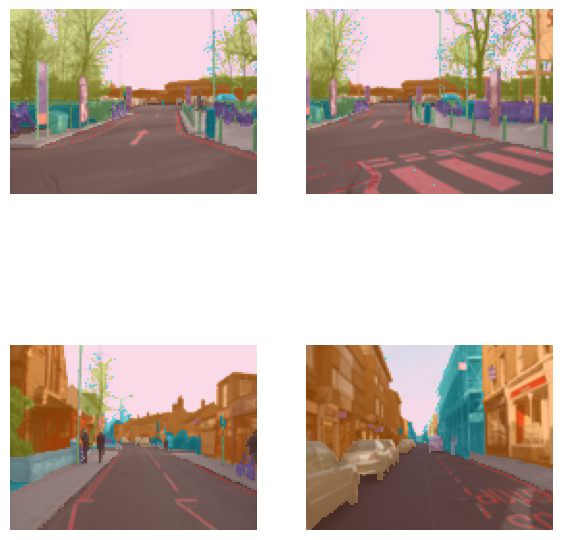

In [2]:
dls = SegmentationDataLoaders.from_label_func(
    path,
    bs=8,
    fnames=get_image_files(path / "images"),
    label_func=lambda image_path: path / "labels" / f"{image_path.stem}_P{image_path.suffix}",
    codes=np.loadtxt(path / "codes.txt", dtype=str),
)

dls.show_batch(max_n=4, figsize=(7, 8))

In [3]:
learner_34 = unet_learner(dls, resnet34)
learner_34.fine_tune(10, 1e-3)

epoch,train_loss,valid_loss,time
0,3.151765,2.523807,00:06


epoch,train_loss,valid_loss,time
0,1.861589,1.488552,00:02
1,1.560740,1.245903,00:01
2,1.435483,1.861553,00:01
3,1.373260,1.119151,00:01
4,1.244175,0.924129,00:01
5,1.127835,0.806493,00:01
6,1.028597,0.758392,00:01
7,0.943405,0.765532,00:01
8,0.875832,0.735503,00:01
9,0.821944,0.731812,00:01


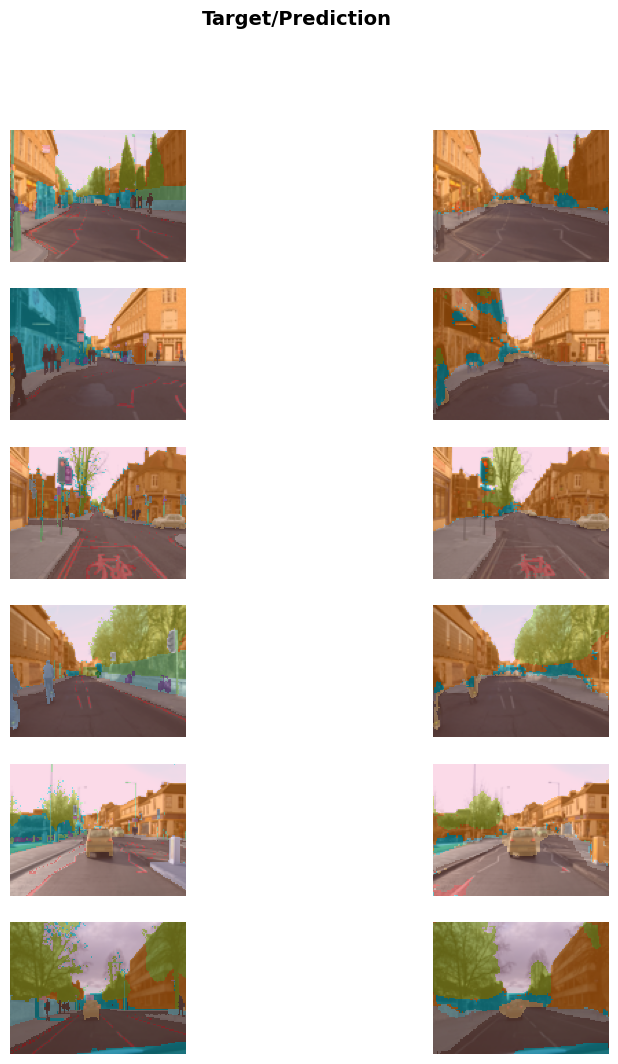

In [6]:
learner_34.show_results(max_n=6, figsize=(10, 12))